<a href="https://colab.research.google.com/github/adityap27/mnist-ann/blob/master/mnit_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.) Data Preprocessing**

In [0]:
#importing libraries 
from keras.datasets import mnist
import numpy as np

# Importing the dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#fixing shapes
X_train=np.expand_dims(X_train,3)
X_test=np.expand_dims(X_test,3)
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))

#Encoding of categorical data to one-hot format
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False)
y_train=onehotencoder.fit_transform(y_train)
y_test=onehotencoder.transform(y_test)

# Splitting the Training into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.175, random_state = 0)

#Feature Scaling
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [0]:
#Creating generator for Real-time Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rotation_range=5,shear_range=0.05,zoom_range=0.05)

train_generator=train_datagen.flow(X_train,y_train,batch_size=128)

# **2.) Build and Train CNN**

In [0]:
#CNN

#import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPool2D,Flatten

In [15]:
#Build CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=1,activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=1,activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding='same',activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax',kernel_initializer='glorot_normal'))

#Compiling model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [16]:
#Training model
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * np.exp(0.1 * (10 - epoch))
callback = keras.callbacks.LearningRateScheduler(scheduler)
history=model.fit(train_generator,epochs=50,validation_data=(X_val,y_val),callbacks=[callback],workers=5,use_multiprocessing=True)

Epoch 1/50
387/387 [==============================] - 11s 28ms/step - loss: 0.2608 - accuracy: 0.9171 - val_loss: 0.0453 - val_accuracy: 0.9860
Epoch 2/50
387/387 [==============================] - 10s 27ms/step - loss: 0.0780 - accuracy: 0.9762 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 3/50
387/387 [==============================] - 10s 26ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0296 - val_accuracy: 0.9909
Epoch 4/50
387/387 [==============================] - 10s 27ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0250 - val_accuracy: 0.9918
Epoch 5/50
387/387 [==============================] - 11s 27ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0217 - val_accuracy: 0.9930
Epoch 6/50
387/387 [==============================] - 10s 27ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0251 - val_accuracy: 0.9925
Epoch 7/50
387/387 [==============================] - 10s 27ms/step - loss: 0.0305 - accuracy: 0.9907 - val_loss: 0.0251 - val_accuracy:

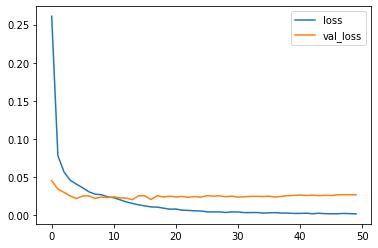

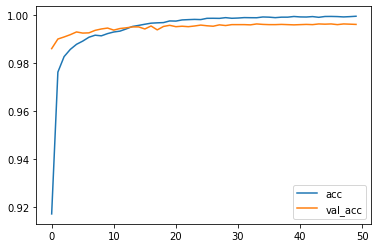

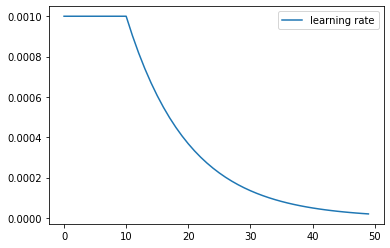

In [17]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
#Learning Rate
plt.plot(history.history['lr'],label='learning rate')
plt.legend()
plt.show()

In [18]:
train=model.evaluate(X_train,y_train)
print(train)

49500/49500 [==============================] - 4s 73us/step
[4.319644763384975e-05, 1.0]


In [19]:
val=model.evaluate(X_val,y_val)
print(val)

10500/10500 [==============================] - 1s 74us/step
[0.026639597142840775, 0.9960952401161194]


In [20]:
print(100*(1-train[1]))
print(100*(train[1]-val[1]))

0.0
0.3904759883880615


In [0]:
model.save('mnist-cnn.model')

# **3.) Evaluation on Test set**

In [22]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 76us/step


[0.01838941933086469, 0.9961000084877014]